# Pymaceuticals Inc.
## Analysis
Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="right")

In [5]:
mouse_study_organized = mouse_study_combined[["Mouse ID", "Timepoint", "Tumor Volume (mm3)",
                                                "Metastatic Sites", "Drug Regimen",
                                                "Sex", "Age_months", "Weight (g)"]]
#Display the data table for preview
mouse_study_organized.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
mouse_study_organized["Mouse ID"].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_organized.loc[mouse_study_organized.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [8]:
mouse_study_cleaned = mouse_study_organized[mouse_study_organized["Mouse ID"].isin(duplicates)==False]

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

# Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties 
# of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [12]:
tumor_mean = mouse_study_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = mouse_study_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = mouse_study_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = mouse_study_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = mouse_study_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [13]:
tumor_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem})
tumor_summary.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

In [15]:
mouse_study_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean",
                                                                       "median",
                                                                       "var",
                                                                       "std",
                                                                       "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [16]:
drug_groups = mouse_study_cleaned.groupby("Drug Regimen")
timepoints = drug_groups[["Timepoint"]].count()
timepoints_sorted = timepoints.sort_values("Timepoint", ascending=False)
timepoints_sorted.head()

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


Text(0, 0.5, 'Number of Mice Tested')

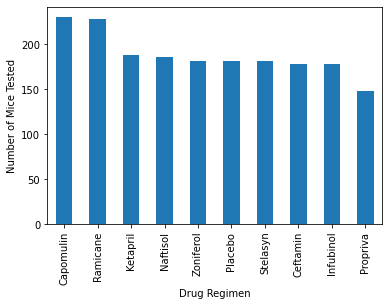

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice 
# tested for each drug regimen using Pandas.
timepoint_chart = timepoints_sorted.plot(kind="bar", legend=False)
timepoint_chart.set_ylabel("Number of Mice Tested")

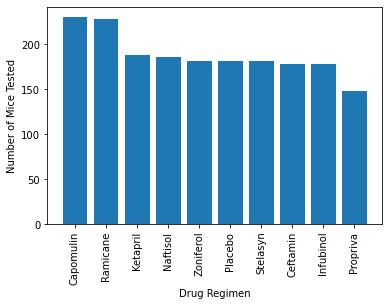

In [18]:
# Generate a bar plot showing the total number of timepoints for all 
# mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints_sorted))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, timepoints_sorted["Timepoint"], align="center")
plt.xticks(tick_locations, timepoints_sorted.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [19]:
sex_groups = mouse_study_cleaned.groupby("Sex")
gender_data = sex_groups[["Mouse ID"]].count()
gender_data_sorted = gender_data.sort_values("Mouse ID", ascending=False)
gender_data_sorted_renamed = gender_data_sorted.rename(columns={"Mouse ID": "Sex"})
gender_data_sorted_renamed.head()

,Sex
Sex,
Male,958
Female,922


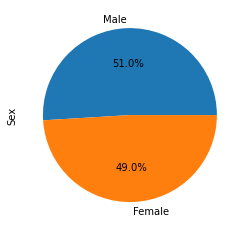

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_chart = gender_data_sorted_renamed.plot(kind="pie", subplots=True, legend=False, 
                                               autopct="%1.1f%%")

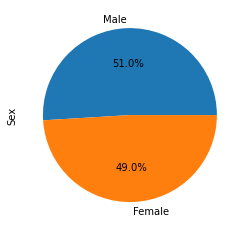

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
sex_total = [958,922]
plt.pie(sex_total, labels=sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

In [23]:
drug_last_timepoints = mouse_study_cleaned.groupby(["Drug Regimen", 
                                                    "Mouse ID"])[["Timepoint"]].max()

In [24]:
drug_last_timepoints_filtered = drug_last_timepoints.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
drug_last_timepoints_filtered.head()

Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45

In [25]:
drug_data_filtered = drug_last_timepoints_filtered.reset_index(inplace=False)
drug_data_filtered.head()

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45


In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [27]:
drug_data_combined = pd.merge(mouse_study_cleaned, drug_data_filtered, 
                              how="right")
drug_data_combined_dropped = drug_data_combined.drop(columns=["Metastatic Sites", 
                                                              "Sex", "Age_months", "Weight (g)"])
drug_data_final = drug_data_combined_dropped.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume"})
drug_data_final

,Mouse ID,Timepoint,Final Tumor Volume,Drug Regimen
0,b128,45,38.982878,Capomulin
1,b742,45,38.939633,Capomulin
2,f966,20,30.485985,Capomulin
3,g288,45,37.074024,Capomulin
4,g316,45,40.159220,Capomulin
...,...,...,...,...
95,x226,0,45.000000,Ceftamin
96,x581,45,64.634949,Ceftamin
97,x822,45,61.386660,Ceftamin
98,y769,45,68.594745,Ceftamin


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

The outliers for drug: Capomulin are Series([], Name: Final Tumor Volume, dtype: float64)
The outliers for drug: Ramicane are Series([], Name: Final Tumor Volume, dtype: float64)
The outliers for drug: Infubinol are 55    36.321346
Name: Final Tumor Volume, dtype: float64
The outliers for drug: Ceftamin are Series([], Name: Final Tumor Volume, dtype: float64)


/var/folders/y3/9tdd1k9n4pd6g_78dd7ml8dm0000gn/T/ipykernel_60964/1710739078.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_regimen)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

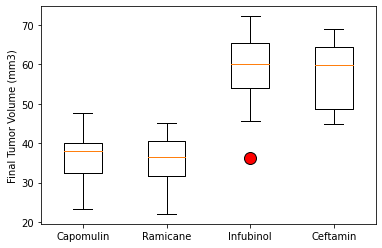

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
plotting = []
# For loop to get drugs
for drug in drug_regimen:
# Locate the rows which contain mice on each drug and get the tumor volumes
    volume = drug_data_final.loc[drug_data_final["Drug Regimen"] == drug, 
                                 "Final Tumor Volume"]
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    your_outlier_variable = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(f"The outliers for drug: {drug} are {your_outlier_variable}")
# Append drug volume to list
    plotting.append(volume)
# Create box plot
fig, ax = plt.subplots()
ax.set_xticklabels(drug_regimen)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
ax.boxplot(plotting, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_index = mouse_study_combined.set_index("Mouse ID")

In [31]:
cap_mouse = mouse_index.loc[["l509"]]
cap_mouse.drop(cap_mouse.columns[[0, 1, 2, 3, 6]], axis=1, inplace=True)

In [32]:
x_axis = cap_mouse["Timepoint"]
tumor = cap_mouse["Tumor Volume (mm3)"]

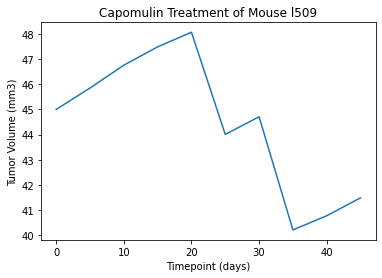

In [33]:
plt.plot(x_axis, tumor)
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [35]:
capomulin_data = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"]=="Capomulin"]

In [36]:
capomulin_avg = capomulin_data.groupby(["Mouse ID"]).mean()
capomulin_avg.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


In [37]:
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]

Text(0.5, 0, 'Weight (g)')

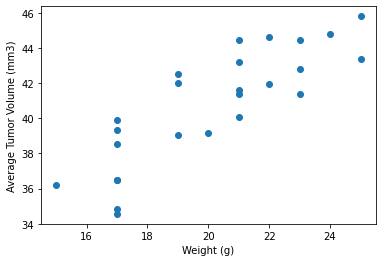

In [38]:
plt.scatter(x_values, y_values)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Text(0.5, 0, 'Weight (g)')

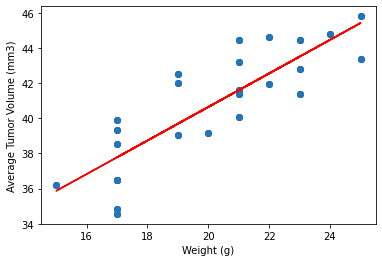

In [44]:
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")